In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Step 1: Load tickers from a CSV file
tickers_df = pd.read_csv('Tickers.csv')  # Ensure this file contains updated tickers
tickers = tickers_df['Ticker'].tolist()  # Adjust based on the column name in your CSV

In [4]:
tickers

['RELIANCE.NS',
 'TCS.NS',
 'INFY.BO',
 'HDFCBANK.BO',
 'ICICIBANK.BO',
 'ADANIPOWER.BO',
 'APOLLOHOSP.BO',
 'HEROMOTOCO.BO',
 'MARUTI.BO',
 'BHARTIARTL.NS']

In [5]:
from datetime import datetime, timedelta
# Get today's date as the end date
end_date = datetime.today().strftime('%Y-%m-%d')
# Calculate the start date (10 years before end date)
start_date = (datetime.today().replace(year=datetime.today().year - 10)).strftime('%Y-%m-%d')

In [6]:
print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2015-04-02
End Date: 2025-04-02


In [7]:
# Download historical data for each ticker without specifying date range
data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=False)
stock_data = data.stack(level=1).reset_index()
# Rename columns to make it more clear
stock_data.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [8]:
stock_data.head()

Date         Ticker         Open         High          Low  \
0 2015-04-06  ADANIPOWER.BO    47.400002    47.400002    48.049999   
1 2015-04-06  APOLLOHOSP.BO  1360.726929  1411.300049  1428.150024   
2 2015-04-06  BHARTIARTL.NS   343.092102   361.223907   368.704346   
3 2015-04-06    HDFCBANK.BO   459.523865   515.650024   518.250000   
4 2015-04-06  HEROMOTOCO.BO  1956.436401  2671.800049  2678.000000   

         Close    Adj Close     Volume  
0    46.750000    48.049999   401324.0  
1  1385.000000  1386.449951    12324.0  
2   359.105957   362.575806  4825167.0  
3   509.625000   517.500000   158370.0  
4  2634.350098  2655.500000    13860.0

In [9]:
stock_data['Ticker'].value_counts()

BHARTIARTL.NS    2468
RELIANCE.NS      2468
TCS.NS           2468
HDFCBANK.BO      2445
INFY.BO          2445
MARUTI.BO        2443
ADANIPOWER.BO    2442
APOLLOHOSP.BO    2442
HEROMOTOCO.BO    2442
ICICIBANK.BO     2442
Name: Ticker, dtype: int64

In [10]:
stock_data.tail()

Date        Ticker          Open          High           Low  \
24500 2025-04-01  ICICIBANK.BO   1317.599976   1317.599976   1352.000000   
24501 2025-04-01       INFY.BO   1527.500000   1527.500000   1547.699951   
24502 2025-04-01     MARUTI.BO  11475.549805  11475.549805  11538.700195   
24503 2025-04-01   RELIANCE.NS   1252.599976   1252.599976   1277.900024   
24504 2025-04-01        TCS.NS   3550.800049   3550.800049   3584.000000   

              Close     Adj Close      Volume  
24500   1315.000000   1340.000000    361544.0  
24501   1518.000000   1535.099976    265555.0  
24502  11289.450195  11476.000000     11962.0  
24503   1249.300049   1264.599976  12099648.0  
24504   3525.000000   3572.699951   2618493.0

In [11]:
s_data = stock_data.copy()

In [12]:
# View dimensions of dataset   
rows, col = stock_data.shape
print ("Dimensions of dataset: {}" . format (stock_data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (24505, 8)
Rows: 24505 
Columns: 8


In [13]:
# Dtype
print(f'The data type contains:\n object --> {stock_data.dtypes.value_counts()[1]}\n float64 --> {stock_data.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [14]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24505 entries, 0 to 24504
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       24505 non-null  datetime64[ns]
 1   Ticker     24505 non-null  object        
 2   Open       24505 non-null  float64       
 3   High       24505 non-null  float64       
 4   Low        24505 non-null  float64       
 5   Close      24505 non-null  float64       
 6   Adj Close  24505 non-null  float64       
 7   Volume     24505 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.5+ MB


In [15]:
float_cols = stock_data.columns.drop(["Ticker","Date"])
stock_data[float_cols] = stock_data[float_cols].round().astype("Int64")
stock_data.head()

Date         Ticker  Open  High   Low  Close  Adj Close   Volume
0 2015-04-06  ADANIPOWER.BO    47    47    48     47         48   401324
1 2015-04-06  APOLLOHOSP.BO  1361  1411  1428   1385       1386    12324
2 2015-04-06  BHARTIARTL.NS   343   361   369    359        363  4825167
3 2015-04-06    HDFCBANK.BO   460   516   518    510        518   158370
4 2015-04-06  HEROMOTOCO.BO  1956  2672  2678   2634       2656    13860

In [16]:
stock_data.sort_values(by="Date").head()

Date         Ticker  Open  High   Low  Close  Adj Close   Volume
0 2015-04-06  ADANIPOWER.BO    47    47    48     47         48   401324
1 2015-04-06  APOLLOHOSP.BO  1361  1411  1428   1385       1386    12324
2 2015-04-06  BHARTIARTL.NS   343   361   369    359        363  4825167
3 2015-04-06    HDFCBANK.BO   460   516   518    510        518   158370
4 2015-04-06  HEROMOTOCO.BO  1956  2672  2678   2634       2656    13860

In [17]:
stock_data1 = stock_data[(stock_data['Ticker'] == 'RELIANCE.NS')]    
stock_data1.head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
8  2015-04-06  RELIANCE.NS   169   189  192    188        191  12334096
18 2015-04-07  RELIANCE.NS   171   190  191    189        189  21275454
28 2015-04-08  RELIANCE.NS   177   198  199    190        191  24821205
38 2015-04-09  RELIANCE.NS   183   205  205    196        198  27276420
48 2015-04-10  RELIANCE.NS   185   207  208    203        205  25323219

In [18]:
# View dimensions of dataset   
rows, col = stock_data1.shape
print ("Dimensions of dataset: {}" . format (stock_data1.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (2468, 8)
Rows: 2468 
Columns: 8


In [19]:
# Dtype
print(f'The data type contains:\n object --> {stock_data1.dtypes.value_counts()[1]}\n float64 --> {stock_data1.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [20]:
stock_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 8 to 24503
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2468 non-null   datetime64[ns]
 1   Ticker     2468 non-null   object        
 2   Open       2468 non-null   Int64         
 3   High       2468 non-null   Int64         
 4   Low        2468 non-null   Int64         
 5   Close      2468 non-null   Int64         
 6   Adj Close  2468 non-null   Int64         
 7   Volume     2468 non-null   Int64         
dtypes: Int64(6), datetime64[ns](1), object(1)
memory usage: 188.0+ KB


In [21]:
stock_data2 = stock_data1.copy()

In [22]:
# Dtype
print(f'The data type contains:\n object --> {stock_data2.dtypes.value_counts()[1]}\n int64 --> {stock_data2.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 int64 --> 6


In [23]:
stock_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 8 to 24503
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2468 non-null   datetime64[ns]
 1   Ticker     2468 non-null   object        
 2   Open       2468 non-null   Int64         
 3   High       2468 non-null   Int64         
 4   Low        2468 non-null   Int64         
 5   Close      2468 non-null   Int64         
 6   Adj Close  2468 non-null   Int64         
 7   Volume     2468 non-null   Int64         
dtypes: Int64(6), datetime64[ns](1), object(1)
memory usage: 188.0+ KB


In [24]:
stock_data2.sort_values(by="Date").head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
8  2015-04-06  RELIANCE.NS   169   189  192    188        191  12334096
18 2015-04-07  RELIANCE.NS   171   190  191    189        189  21275454
28 2015-04-08  RELIANCE.NS   177   198  199    190        191  24821205
38 2015-04-09  RELIANCE.NS   183   205  205    196        198  27276420
48 2015-04-10  RELIANCE.NS   185   207  208    203        205  25323219

In [25]:
# Plotting count plot by year
Year = stock_data2['Date'].dt.year

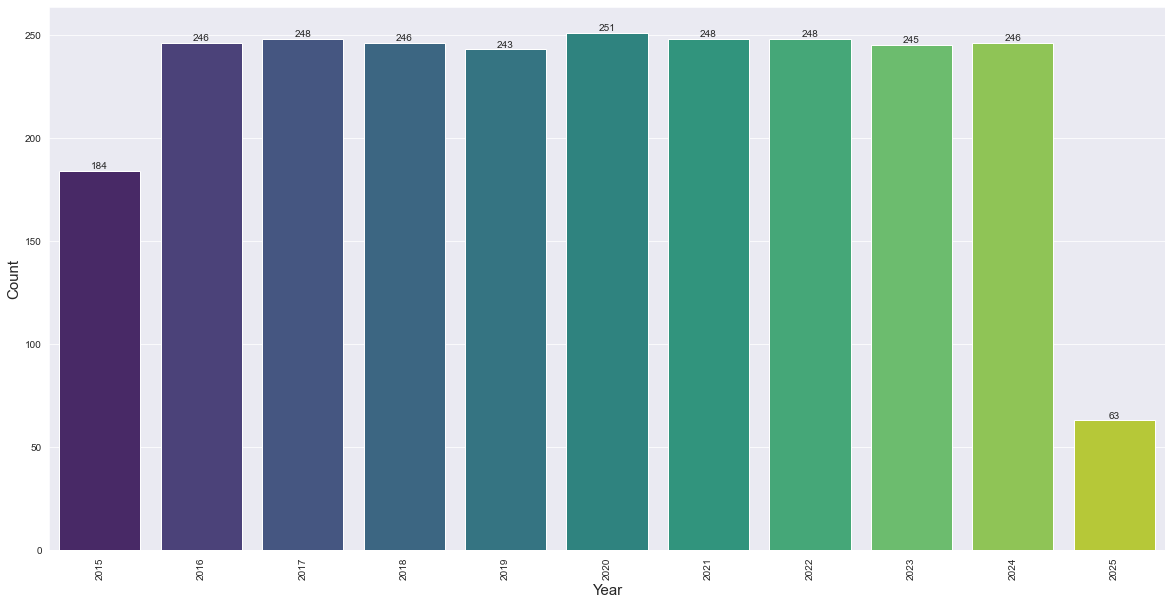

In [26]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data2, x=Year, palette='viridis')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

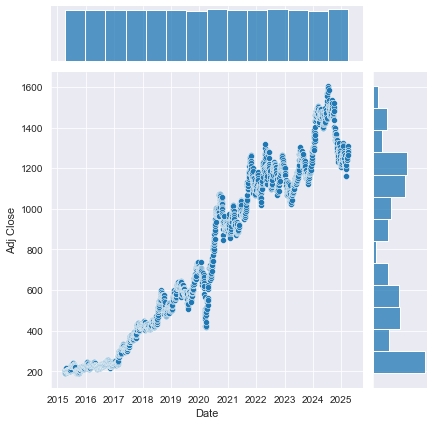

In [27]:
# Target-Date
sns.jointplot(data=stock_data2, x="Date", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Date", fontsize=11)
plt.show()

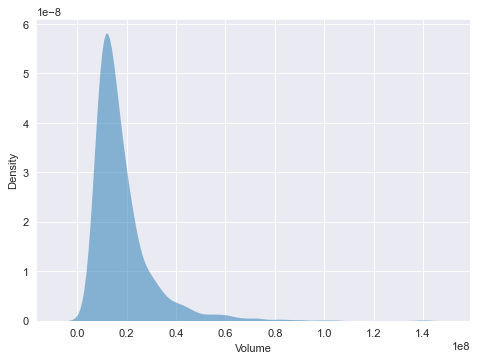

In [28]:
# The data distribution in "Volume"
plt.figure(figsize=(7,5), dpi=80)
sns.kdeplot(data=stock_data2, x="Volume", fill=True, common_norm=False,
            palette="crest", alpha=.5, linewidth=0)
plt.show()

In [29]:
# Assessing the 0 values of the "Volume" column
len(stock_data2[stock_data2["Volume"]==0])

1

In [30]:
stock_data3 = stock_data2[stock_data2["Volume"] != 0]

In [31]:
stock_data3.head()

Date       Ticker  Open  High  Low  Close  Adj Close    Volume
8  2015-04-06  RELIANCE.NS   169   189  192    188        191  12334096
18 2015-04-07  RELIANCE.NS   171   190  191    189        189  21275454
28 2015-04-08  RELIANCE.NS   177   198  199    190        191  24821205
38 2015-04-09  RELIANCE.NS   183   205  205    196        198  27276420
48 2015-04-10  RELIANCE.NS   185   207  208    203        205  25323219

In [32]:
# Assessing the 0 values of the "Volume" column
len(stock_data3[stock_data3["Volume"]==0])

0

In [33]:
# Assessing the 0 values of the "Volume" column
len(stock_data[stock_data["Volume"]==0])

3

In [34]:
stock_data = stock_data[stock_data["Volume"] != 0]

In [35]:
s_data2=stock_data.copy()

In [36]:
# Plotting count plot by year
Year1 = stock_data['Date'].dt.year

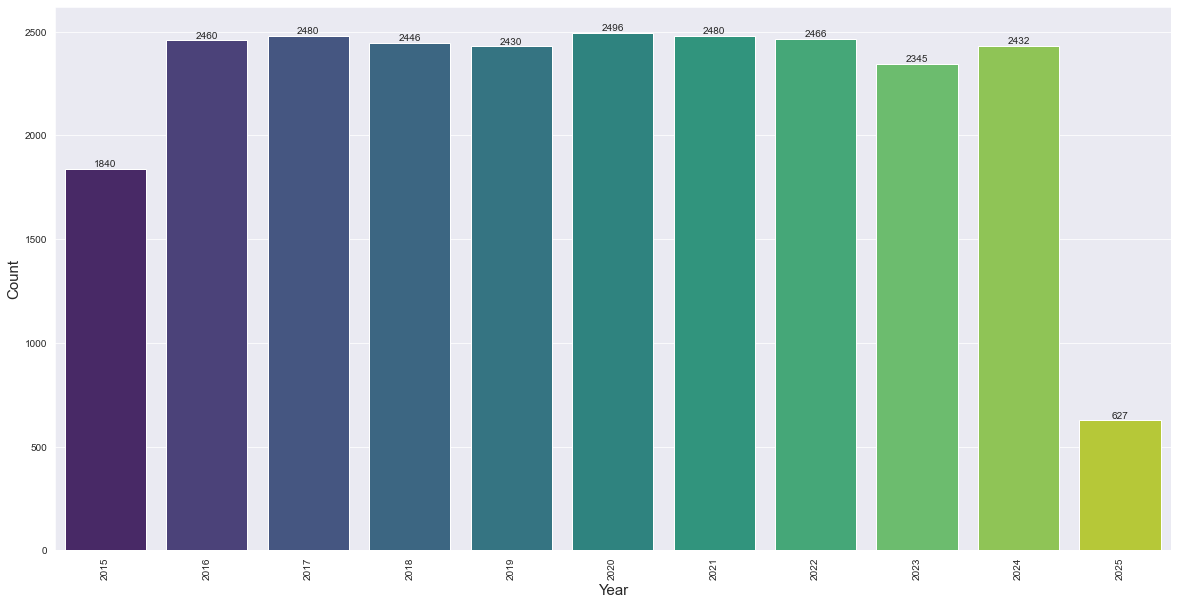

In [37]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data, x=Year1, palette='viridis')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

In [38]:
for i in stock_data.columns.drop(['Ticker','Date']):
    print("The min value of ",i," is ",stock_data[i].min())

The min value of  Open  is  15
The min value of  High  is  15
The min value of  Low  is  16
The min value of  Close  is  15
The min value of  Adj Close  is  16
The min value of  Volume  is  759


In [39]:
for i in stock_data.columns.drop(['Ticker','Date']):
    print("The max value of ",i," is ",stock_data[i].max())

The max value of  Open  is  13497
The max value of  High  is  13497
The max value of  Low  is  13675
The max value of  Close  is  13275
The max value of  Adj Close  is  13410
The max value of  Volume  is  326148900


In [40]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker                  0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

In [41]:
columns_no_varience = []
for col in stock_data.columns:
    if len(stock_data[col].unique()) ==1:
        columns_no_varience.append(col)
        stock_data.drop([col], axis = 1, inplace = True)
print(columns_no_varience)
print (stock_data.shape)

[]
(24502, 8)


In [42]:
duplicate_rows = stock_data.duplicated()
print(duplicate_rows.any())
stock_data.drop_duplicates(inplace = True)
print(stock_data.shape)

False
(24502, 8)


In [43]:
## Checking For Duplicated Rows in Data
stock_data.duplicated().sum()

0

In [44]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Skewness of', column, 'outlier treatment: ', stock_data[column].skew())

Skewness of Open outlier treatment:  2.155349093316589
Skewness of High outlier treatment:  2.0354667164917783
Skewness of Close outlier treatment:  2.038313158009125
Skewness of Low outlier treatment:  2.0317537922215707
Skewness of Adj Close outlier treatment:  2.0355901024425487


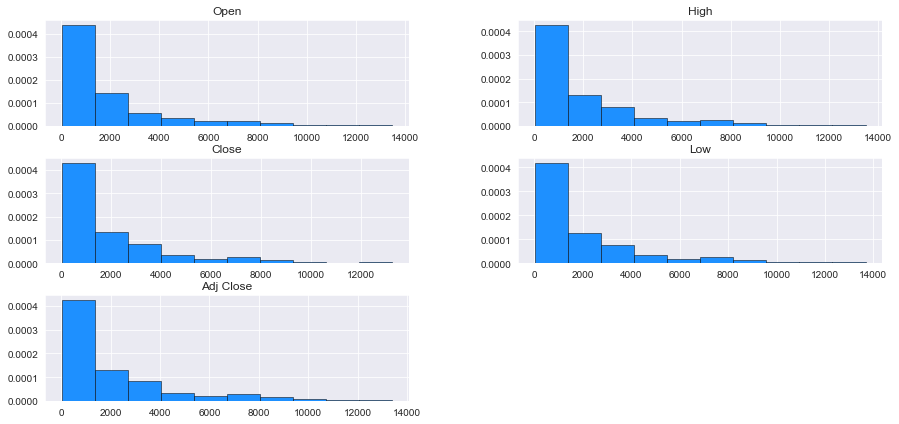

In [45]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

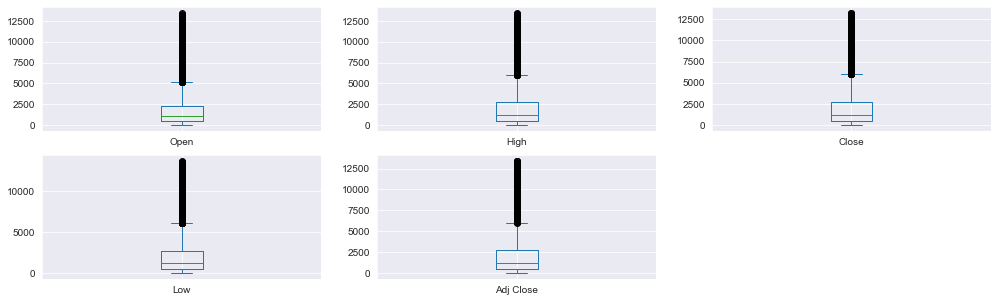

In [46]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

In [47]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    Q1 = stock_data[column].quantile(0.25)
    Q3 = stock_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Drop NaN values before comparison
    column_data = stock_data[column].dropna()
    outliers = [x for x in column_data if x < lower or x > upper]

    print(column)
    print('Identified outliers: %d' % len(outliers))
    print('*' * 40)

Open
Identified outliers: 2426
****************************************
High
Identified outliers: 2113
****************************************
Close
Identified outliers: 2106
****************************************
Low
Identified outliers: 2112
****************************************
Adj Close
Identified outliers: 2112
****************************************


In [48]:
# Drop all NaN values
stock_data = stock_data.dropna()

In [49]:
stock_data['Open'].isna().sum()

0

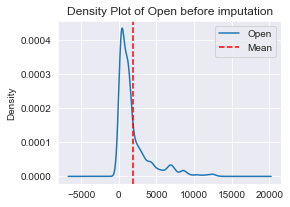

In [50]:
stock_data['Open'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Open before imputation')
plt.axvline(x=stock_data['Open'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [51]:
Skewness_of_Open = stock_data['Open'].skew()
Skewness_of_Open

2.155349093316589

In [52]:
stock_data['Close'].isna().sum()

0

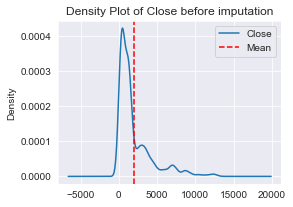

In [53]:
stock_data['Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Close before imputation')
plt.axvline(x=stock_data['Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [54]:
Skewness_of_close = stock_data['Close'].skew()
Skewness_of_close

2.038313158009125

In [55]:
stock_data['Low'].isna().sum()

0

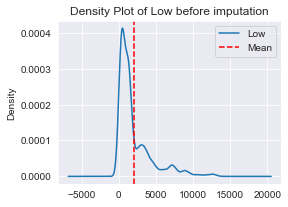

In [56]:
stock_data['Low'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Low before imputation')
plt.axvline(x=stock_data['Low'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [57]:
Skewness_of_low = stock_data['Low'].skew()
Skewness_of_low

2.0317537922215707

In [58]:
stock_data['High'].isna().sum()

0

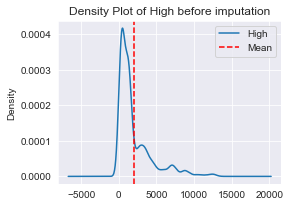

In [59]:
stock_data['High'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of High before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [60]:
Skewness_of_high = stock_data['High'].skew()
Skewness_of_high

2.0354667164917783

In [61]:
stock_data['Adj Close'].isna().sum()

0

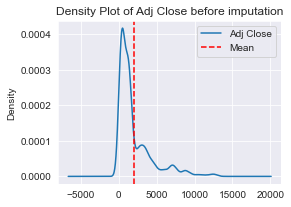

In [62]:
stock_data['Adj Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Adj Close before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [63]:
Skewness_of_high = stock_data['Adj Close'].skew()
Skewness_of_high

2.0355901024425487

In [64]:
stock_data['Volume'].isna().sum()

0

In [65]:
Skewness_of_vol = stock_data['Volume'].skew()
Skewness_of_vol

8.207038659047273

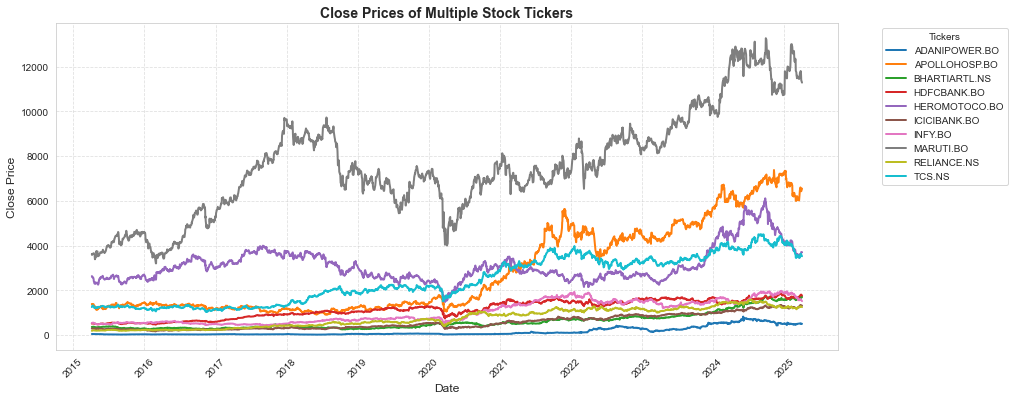

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))  # Increase figure size for better visibility

# Use seaborn style
sns.set_style('whitegrid')

# Plot each ticker’s close price
for ticker in stock_data['Ticker'].unique():
    plt.plot(stock_data[stock_data['Ticker'] == ticker]['Date'], 
             stock_data[stock_data['Ticker'] == ticker]['Close'], 
             label=ticker, linewidth=2)  # Add label and set line width

# Formatting the plot
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.title("Close Prices of Multiple Stock Tickers", fontsize=14, fontweight='bold')
plt.legend(title="Tickers", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside for clarity
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.6)  # Add dashed grid lines

# Show plot
plt.show()


In [67]:
stock_data['Ticker'].value_counts()

BHARTIARTL.NS    2467
RELIANCE.NS      2467
TCS.NS           2467
HDFCBANK.BO      2445
INFY.BO          2445
MARUTI.BO        2443
ADANIPOWER.BO    2442
APOLLOHOSP.BO    2442
HEROMOTOCO.BO    2442
ICICIBANK.BO     2442
Name: Ticker, dtype: int64

In [68]:
stock_data.loc[(stock_data['Ticker'] == 'MARUTI.BO') , 'Ticker'] = np.nan

In [69]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker               2443
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

In [70]:
stock_data = stock_data.dropna(subset=['Ticker'])

In [71]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Date                    0
Ticker                  0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0

In [72]:
stock_data['Ticker'].value_counts()

BHARTIARTL.NS    2467
RELIANCE.NS      2467
TCS.NS           2467
HDFCBANK.BO      2445
INFY.BO          2445
ADANIPOWER.BO    2442
APOLLOHOSP.BO    2442
HEROMOTOCO.BO    2442
ICICIBANK.BO     2442
Name: Ticker, dtype: int64

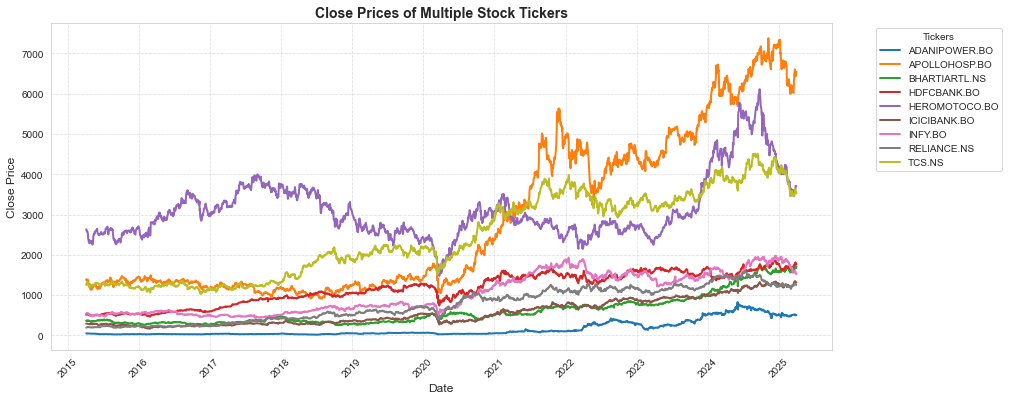

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))  # Increase figure size for better visibility

# Use seaborn style
sns.set_style('whitegrid')

# Plot each ticker’s close price
for ticker in stock_data['Ticker'].unique():
    plt.plot(stock_data[stock_data['Ticker'] == ticker]['Date'], 
             stock_data[stock_data['Ticker'] == ticker]['Close'], 
             label=ticker, linewidth=2)  # Add label and set line width

# Formatting the plot
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.title("Close Prices of Multiple Stock Tickers", fontsize=14, fontweight='bold')
plt.legend(title="Tickers", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside for clarity
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.6)  # Add dashed grid lines

# Show plot
plt.show()

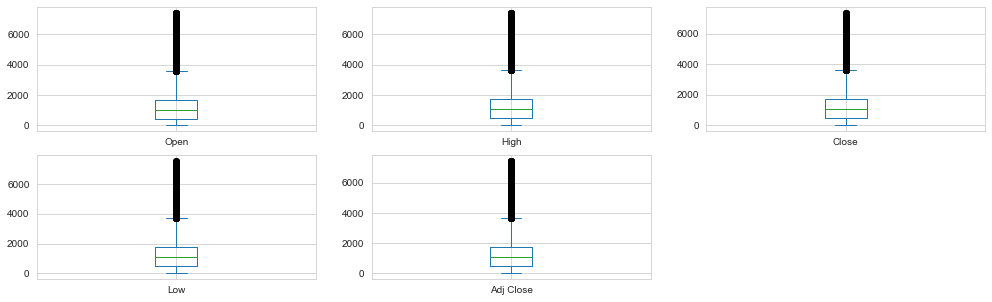

In [74]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

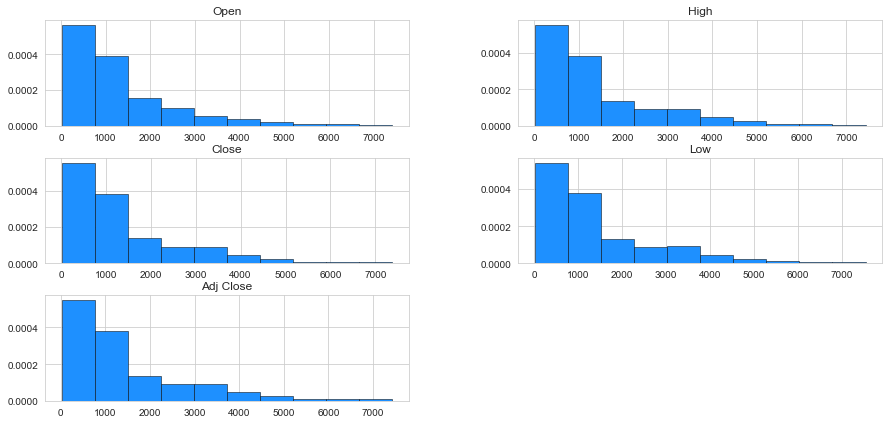

In [75]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

<AxesSubplot:>

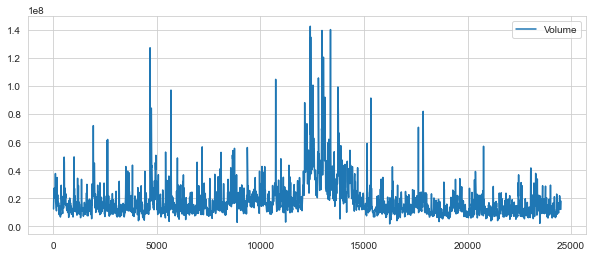

In [76]:
# Now let's plot the total volume of stock being traded each day over the past year
stock_data3['Volume'].plot(legend=True, figsize=(10,4))

In [77]:
stock_data.drop(columns=['Close'], inplace=True)
stock_data3.drop(columns=['Close'], inplace=True)

In [78]:
# Condition for Bullish case: Low ≤ Open ≤ Close ≤ High
bullish_condition = (stock_data["Low"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["High"])
# Condition for Bearish case: Low ≤ Close ≤ Open ≤ High
bearish_condition = (stock_data["Low"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["High"])
# Rows that do not satisfy either condition
invalid_rows = stock_data[~(bullish_condition | bearish_condition)]
# Print invalid rows if any
if not invalid_rows.empty:
    print("Invalid rows found that do not match Bullish or Bearish cases:")
    print(invalid_rows)
else:
    print("All rows in stock_data are valid.")

Invalid rows found that do not match Bullish or Bearish cases:
            Date         Ticker  Open  High   Low  Adj Close    Volume
0     2015-04-06  ADANIPOWER.BO    47    47    48         48    401324
1     2015-04-06  APOLLOHOSP.BO  1361  1411  1428       1386     12324
2     2015-04-06  BHARTIARTL.NS   343   361   369        363   4825167
3     2015-04-06    HDFCBANK.BO   460   516   518        518    158370
4     2015-04-06  HEROMOTOCO.BO  1956  2672  2678       2656     13860
...          ...            ...   ...   ...   ...        ...       ...
24499 2025-04-01  HEROMOTOCO.BO  3763  3763  3817       3722     14632
24500 2025-04-01   ICICIBANK.BO  1318  1318  1352       1340    361544
24501 2025-04-01        INFY.BO  1528  1528  1548       1535    265555
24503 2025-04-01    RELIANCE.NS  1253  1253  1278       1265  12099648
24504 2025-04-01         TCS.NS  3551  3551  3584       3573   2618493

[21722 rows x 7 columns]


In [81]:
# Fix 'Low' price (should be the minimum of Open, Adj Close, and itself)
stock_data["Low"] = stock_data[["Low", "Open", "Adj Close"]].min(axis=1)

# Fix 'High' price (should be the maximum of Open, Adj Close, and itself)
stock_data["High"] = stock_data[["High", "Open", "Adj Close"]].max(axis=1)

# Ensure 'Low' is never greater than 'High'
stock_data["Low"] = stock_data[["Low", "High"]].min(axis=1)

In [83]:
# Re-check if all rows are now valid
bullish_condition = (stock_data["Low"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["High"])
bearish_condition = (stock_data["Low"] <= stock_data["Adj Close"]) & (stock_data["Adj Close"] <= stock_data["Open"]) & (stock_data["Open"] <= stock_data["High"])

# Find still invalid rows
invalid_rows = stock_data[~(bullish_condition | bearish_condition)]

if invalid_rows.empty:
    print("All rows are now valid!")
else:
    print("Some rows are still invalid:")
    print(invalid_rows)

All rows are now valid!


In [84]:
stock_data.describe()

Open          High           Low    Adj Close          Volume
count      22059.0  22059.000000  22059.000000      22059.0         22059.0
mean   1328.923931   1431.665533   1327.028061   1424.09393  3735594.265606
std    1280.838476   1352.531601   1277.795826  1345.544949  8594158.147406
min           15.0     16.000000     15.000000         16.0           759.0
25%          396.0    471.000000    395.500000        468.0        109116.0
50%         1016.0   1089.000000   1016.000000       1084.0        636277.0
75%         1676.0   1753.500000   1672.500000       1744.0       3171807.0
max         7422.0   7437.000000   7422.000000       7437.0     326148900.0

In [85]:
stock_data.corr()   

Open      High       Low  Adj Close    Volume
Open       1.000000  0.993189  0.999951   0.992972 -0.185741
High       0.993189  1.000000  0.993341   0.999895 -0.197647
Low        0.999951  0.993341  1.000000   0.993229 -0.186101
Adj Close  0.992972  0.999895  0.993229   1.000000 -0.198116
Volume    -0.185741 -0.197647 -0.186101  -0.198116  1.000000

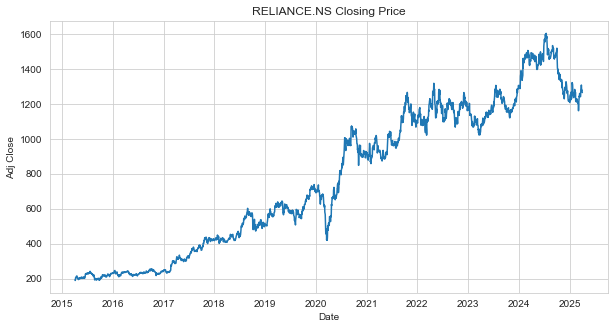

In [86]:
# plot lineplot
stock = 'RELIANCE.NS'
plt.figure(figsize = (10,5))
sns.lineplot(data = stock_data3,x='Date',y='Adj Close')
plt.title(f'{stock} Closing Price')
plt.show()

<AxesSubplot:>

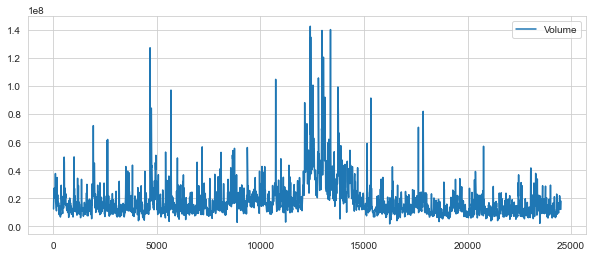

In [87]:
stock_data3['Volume'].plot(legend=True,figsize=(10,4))

In [88]:
Tech_list=stock_data["Ticker"].unique()
Tech_list

array(['ADANIPOWER.BO', 'APOLLOHOSP.BO', 'BHARTIARTL.NS', 'HDFCBANK.BO',
       'HEROMOTOCO.BO', 'ICICIBANK.BO', 'INFY.BO', 'RELIANCE.NS',
       'TCS.NS'], dtype=object)

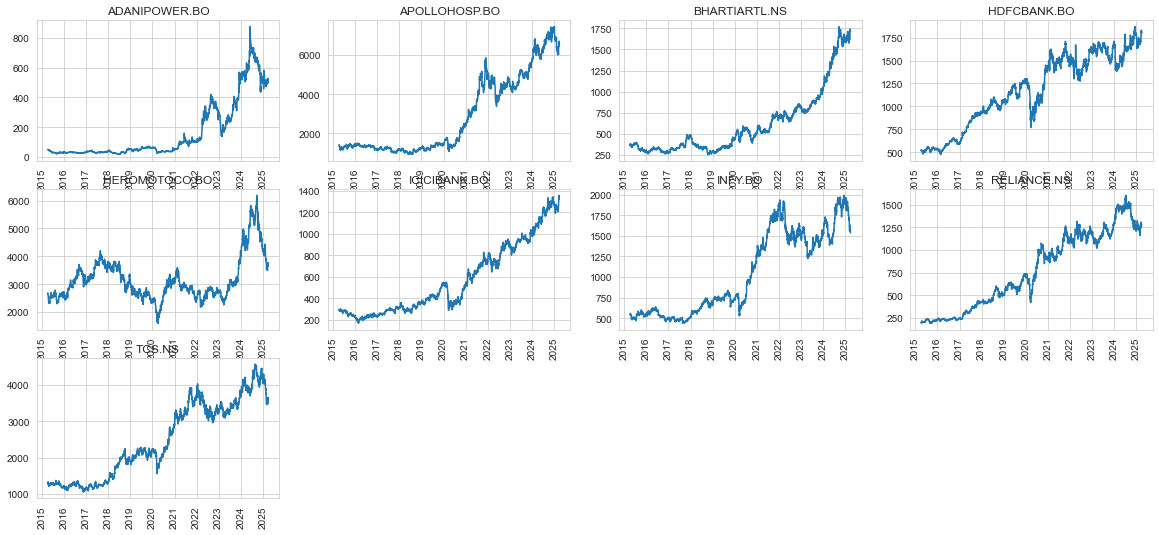

In [91]:
plt.figure(figsize=(20,15))
for i, company in enumerate(Tech_list,1):
    plt.subplot(5,4,i)
    plt.title(company)
    df=stock_data[stock_data["Ticker"]== company]
    plt.plot(df["Date"], df["Adj Close"])
    plt.xticks(rotation="vertical")

In [92]:
import plotly.express as px
for comapny in Tech_list:
    df= stock_data[stock_data["Ticker"]== company]
    plot=px.line(df,x="Date",y= "Volume",title=comapny)
    plot.show()

In [93]:
stock_data3.head()

Date       Ticker  Open  High  Low  Adj Close    Volume
8  2015-04-06  RELIANCE.NS   169   189  192        191  12334096
18 2015-04-07  RELIANCE.NS   171   190  191        189  21275454
28 2015-04-08  RELIANCE.NS   177   198  199        191  24821205
38 2015-04-09  RELIANCE.NS   183   205  205        198  27276420
48 2015-04-10  RELIANCE.NS   185   207  208        205  25323219

In [94]:
col=['Open','Low','High','Adj Close']
stock_data3[col] = stock_data3[col].astype(float)

In [95]:
stock_data3["Daily price change"]= stock_data3["Adj Close"]-stock_data3["Open"]

In [96]:
stock_data3.head()

Date       Ticker   Open   High    Low  Adj Close    Volume  \
8  2015-04-06  RELIANCE.NS  169.0  189.0  192.0      191.0  12334096   
18 2015-04-07  RELIANCE.NS  171.0  190.0  191.0      189.0  21275454   
28 2015-04-08  RELIANCE.NS  177.0  198.0  199.0      191.0  24821205   
38 2015-04-09  RELIANCE.NS  183.0  205.0  205.0      198.0  27276420   
48 2015-04-10  RELIANCE.NS  185.0  207.0  208.0      205.0  25323219   

    Daily price change  
8                 22.0  
18                18.0  
28                14.0  
38                15.0  
48                20.0

In [97]:
stock_data3["% daily price change"]= ((stock_data3["Daily price change"])/stock_data3["Adj Close"])*100

In [98]:
stock_data3.head()

Date       Ticker   Open   High    Low  Adj Close    Volume  \
8  2015-04-06  RELIANCE.NS  169.0  189.0  192.0      191.0  12334096   
18 2015-04-07  RELIANCE.NS  171.0  190.0  191.0      189.0  21275454   
28 2015-04-08  RELIANCE.NS  177.0  198.0  199.0      191.0  24821205   
38 2015-04-09  RELIANCE.NS  183.0  205.0  205.0      198.0  27276420   
48 2015-04-10  RELIANCE.NS  185.0  207.0  208.0      205.0  25323219   

    Daily price change  % daily price change  
8                 22.0             11.518325  
18                18.0              9.523810  
28                14.0              7.329843  
38                15.0              7.575758  
48                20.0              9.756098

In [99]:
plot=px.line(stock_data3, x="Date", y="% daily price change", title= "RELIANCE.NS")
plot.show()

In [100]:
fig = px.line(stock_data3, x="Date", y="% daily price change", title='Daily price change in stock' ,template = 'plotly_dark')
fig.show()

In [101]:
stock_data3["Smoothed Change"] = stock_data3["% daily price change"].rolling(window=20).mean()

In [102]:
plot = px.line(stock_data3, x="Date", y="Smoothed Change", title="RELIANCE.NS - Smoothed Daily Price Change")
plot.show()

In [103]:
stock_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 8 to 24503
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2467 non-null   datetime64[ns]
 1   Ticker                2467 non-null   object        
 2   Open                  2467 non-null   float64       
 3   High                  2467 non-null   float64       
 4   Low                   2467 non-null   float64       
 5   Adj Close             2467 non-null   float64       
 6   Volume                2467 non-null   Int64         
 7   Daily price change    2467 non-null   float64       
 8   % daily price change  2467 non-null   float64       
 9   Smoothed Change       2448 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(7), object(1)
memory usage: 214.4+ KB


<AxesSubplot:xlabel='Date'>

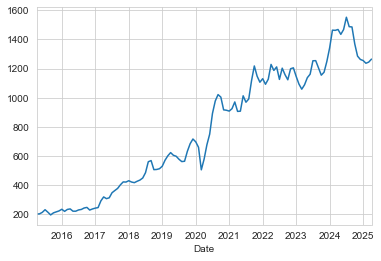

In [104]:
# Convert 'Date' column to datetime if it's not already in datetime format
stock_data3['Date'] = pd.to_datetime(stock_data3['Date'])
# Set 'Date' as the index
stock_data3.set_index('Date', inplace=True)
# Now you can resample by month and plot the mean of 'Close' prices
stock_data3['Adj Close'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

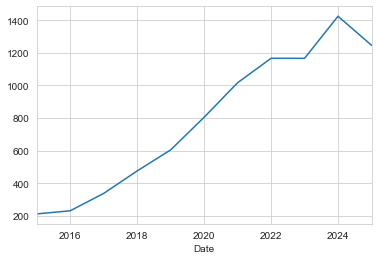

In [105]:
stock_data3['Adj Close'].resample('Y').mean().plot()

In [106]:
# Pivot the dataset to get Close prices for each ticker
close_prices = s_data.pivot(columns='Ticker', values='Adj Close')
# Reset the index to simple integers
close_prices.reset_index(drop=True, inplace=True)
# Assign index as 1, 2, 3...
close_prices.index = range(1, len(close_prices) + 1)

In [107]:
close_prices.head()

Ticker  ADANIPOWER.BO  APOLLOHOSP.BO  BHARTIARTL.NS  HDFCBANK.BO  \
1           48.049999            NaN            NaN          NaN   
2                 NaN    1386.449951            NaN          NaN   
3                 NaN            NaN     362.575806          NaN   
4                 NaN            NaN            NaN        517.5   
5                 NaN            NaN            NaN          NaN   

Ticker  HEROMOTOCO.BO  ICICIBANK.BO  INFY.BO  MARUTI.BO  RELIANCE.NS  TCS.NS  
1                 NaN           NaN      NaN        NaN          NaN     NaN  
2                 NaN           NaN      NaN        NaN          NaN     NaN  
3                 NaN           NaN      NaN        NaN          NaN     NaN  
4                 NaN           NaN      NaN        NaN          NaN     NaN  
5              2655.5           NaN      NaN        NaN          NaN     NaN

In [108]:
# Fill missing values using forward fill
close_prices.fillna(method='ffill', inplace=True)
# Optionally, use backward fill
close_prices.fillna(method='bfill', inplace=True)

In [109]:
close_prices.head()

Ticker  ADANIPOWER.BO  APOLLOHOSP.BO  BHARTIARTL.NS  HDFCBANK.BO  \
1           48.049999    1386.449951     362.575806        517.5   
2           48.049999    1386.449951     362.575806        517.5   
3           48.049999    1386.449951     362.575806        517.5   
4           48.049999    1386.449951     362.575806        517.5   
5           48.049999    1386.449951     362.575806        517.5   

Ticker  HEROMOTOCO.BO  ICICIBANK.BO  INFY.BO  MARUTI.BO  RELIANCE.NS  TCS.NS  
1              2655.5    295.454559    544.5     3642.0   191.095535  1279.0  
2              2655.5    295.454559    544.5     3642.0   191.095535  1279.0  
3              2655.5    295.454559    544.5     3642.0   191.095535  1279.0  
4              2655.5    295.454559    544.5     3642.0   191.095535  1279.0  
5              2655.5    295.454559    544.5     3642.0   191.095535  1279.0

In [110]:
close_prices.isnull().sum()

Ticker
ADANIPOWER.BO    0
APOLLOHOSP.BO    0
BHARTIARTL.NS    0
HDFCBANK.BO      0
HEROMOTOCO.BO    0
ICICIBANK.BO     0
INFY.BO          0
MARUTI.BO        0
RELIANCE.NS      0
TCS.NS           0
dtype: int64

In [111]:
missing_values = pd.DataFrame(close_prices.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                       
ADANIPOWER.BO               0
APOLLOHOSP.BO               0
BHARTIARTL.NS               0
HDFCBANK.BO                 0
HEROMOTOCO.BO               0
ICICIBANK.BO                0
INFY.BO                     0
MARUTI.BO                   0
RELIANCE.NS                 0
TCS.NS                      0

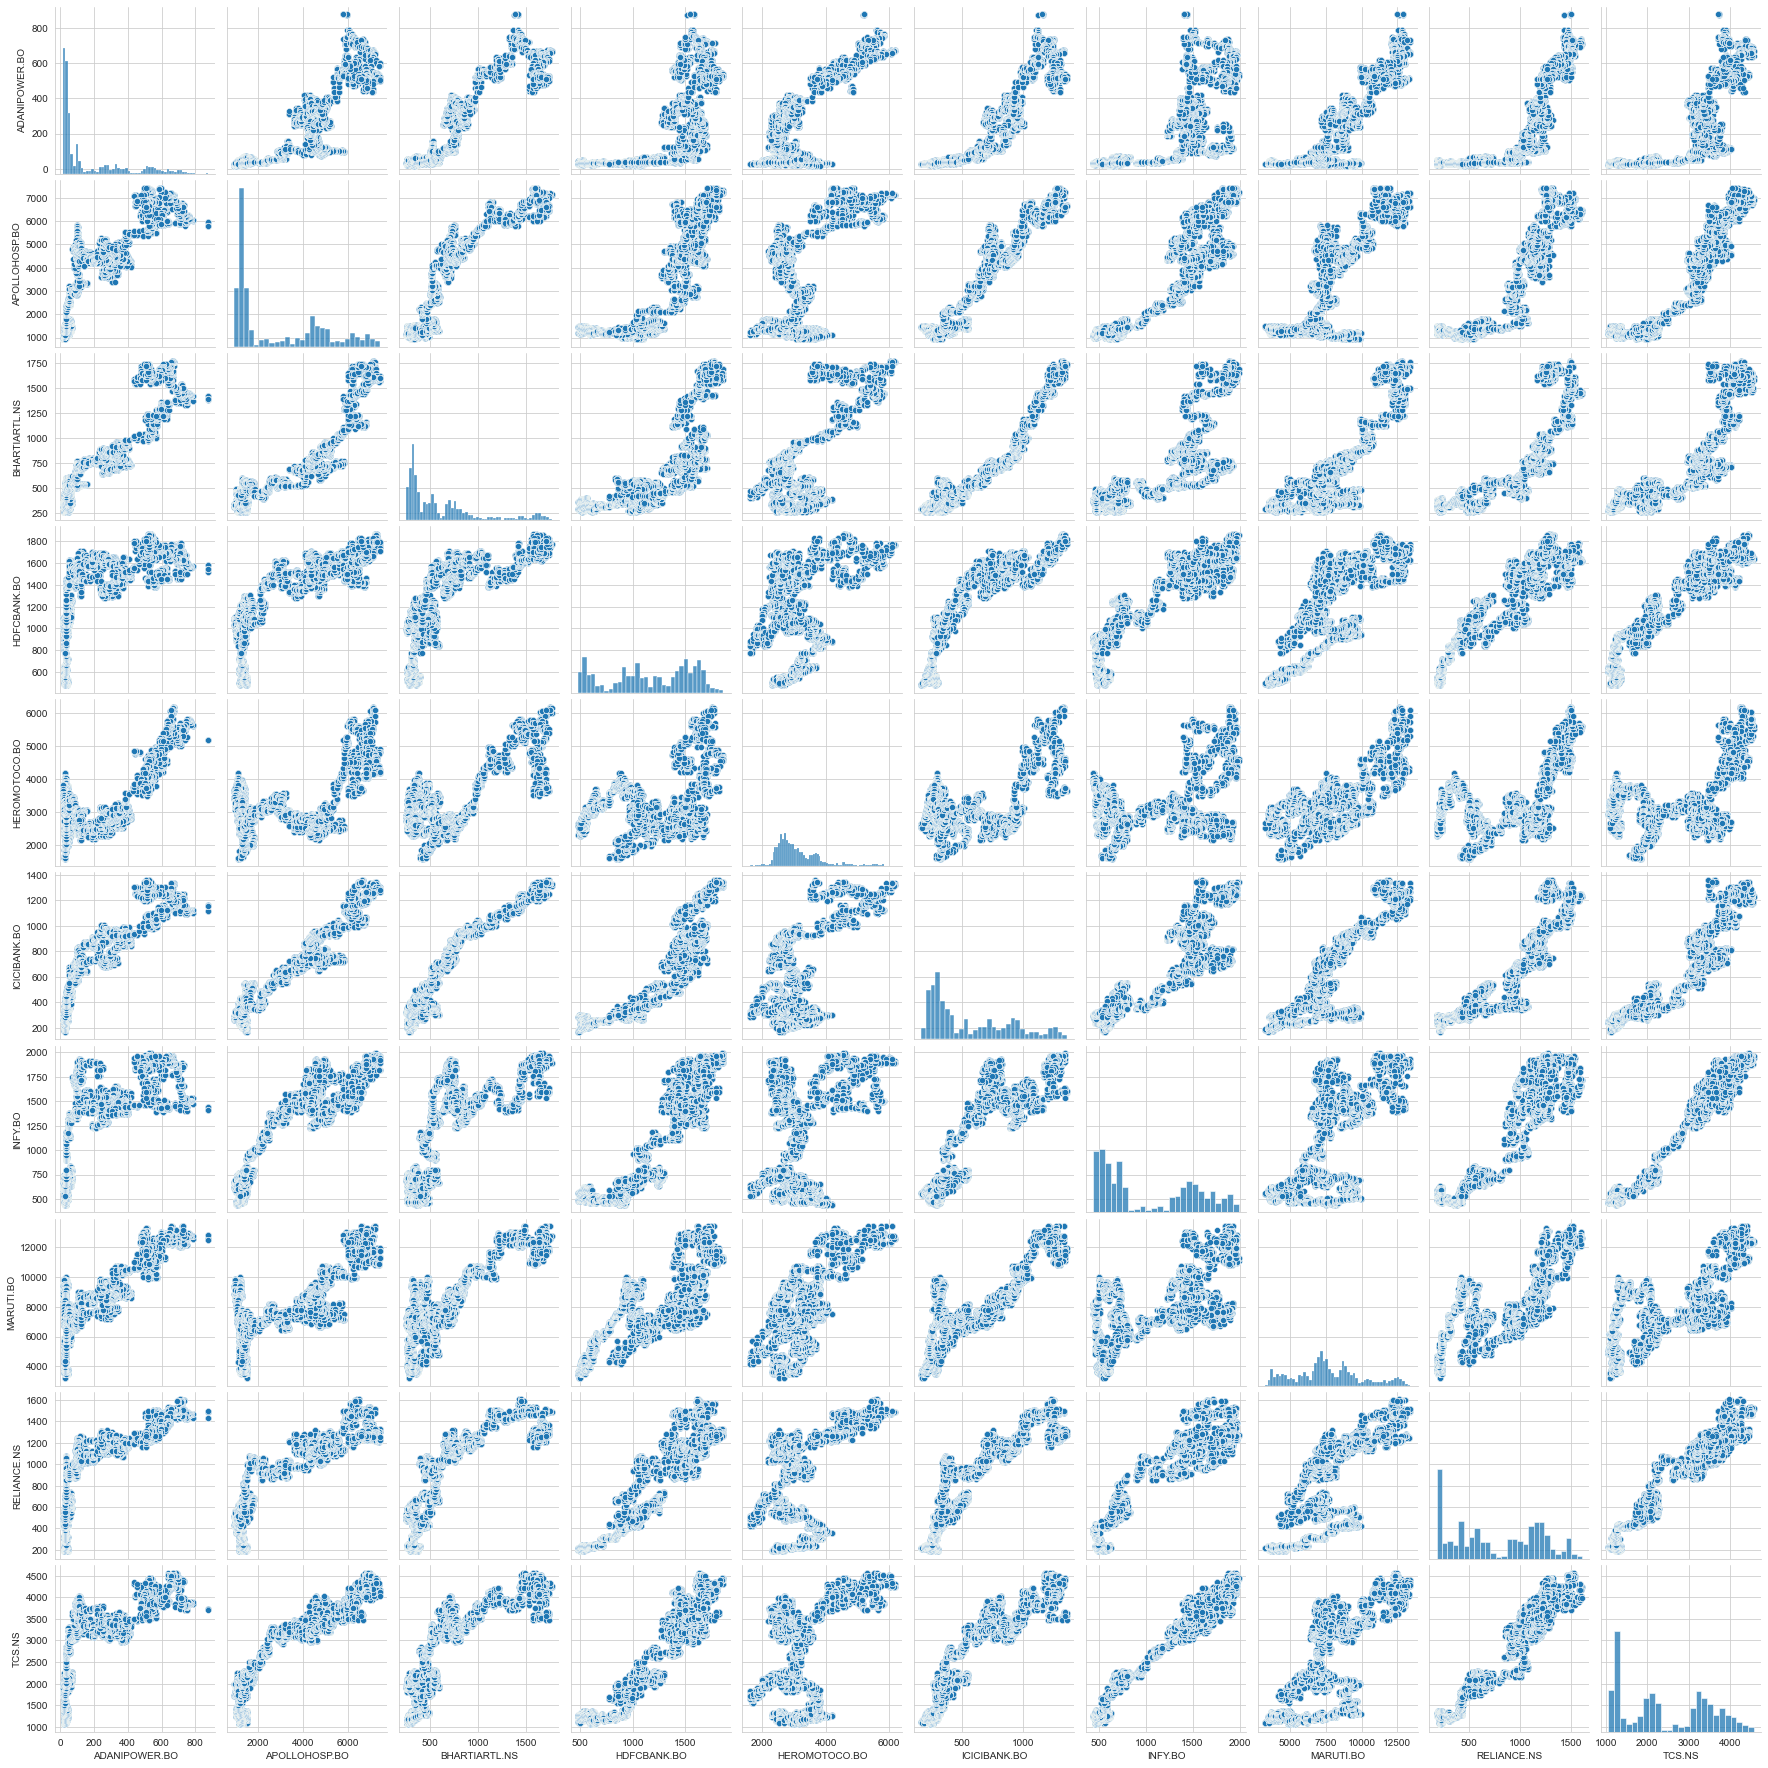

In [112]:
sns.pairplot(data=close_prices)

<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

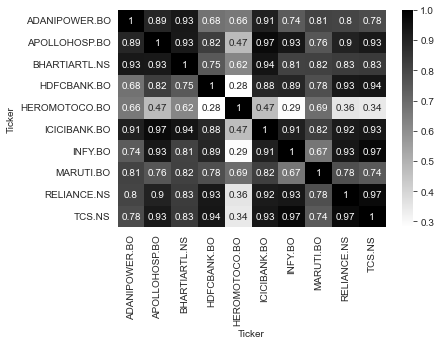

In [113]:
sns.heatmap(close_prices.corr(),annot=True,cmap='gray_r',linecolor="black")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2015-12-31 00:00:00'),
  Text(1, 0, '2016-12-31 00:00:00'),
  Text(2, 0, '2017-12-31 00:00:00'),
  Text(3, 0, '2018-12-31 00:00:00'),
  Text(4, 0, '2019-12-31 00:00:00'),
  Text(5, 0, '2020-12-31 00:00:00'),
  Text(6, 0, '2021-12-31 00:00:00'),
  Text(7, 0, '2022-12-31 00:00:00'),
  Text(8, 0, '2023-12-31 00:00:00'),
  Text(9, 0, '2024-12-31 00:00:00'),
  Text(10, 0, '2025-12-31 00:00:00')])

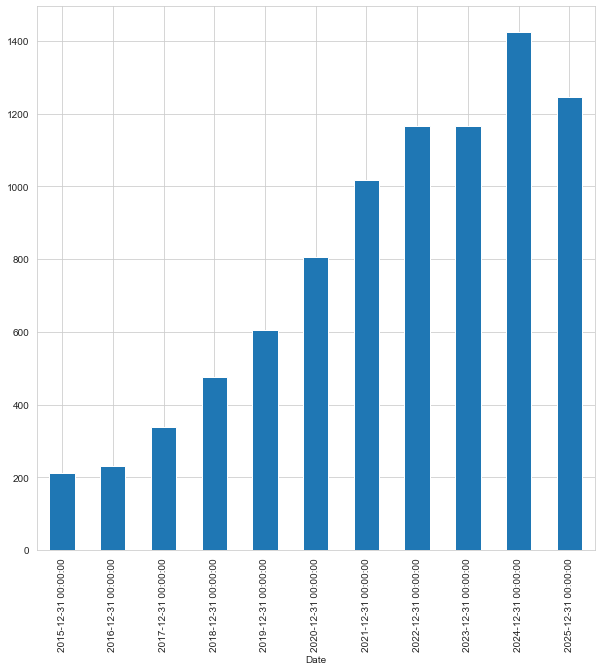

In [114]:
plt.figure(figsize=(10,10))
stock_data3['Adj Close'].resample("Y").mean().plot(kind="bar")
plt.xticks(rotation="vertical")

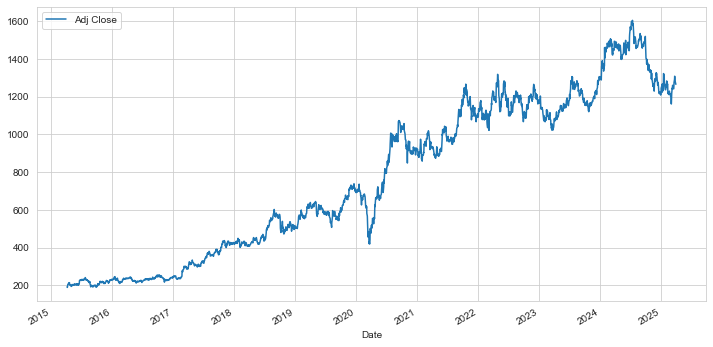

In [115]:
# Let's see a historical view of the closing price
stock_data3['Adj Close'].plot(legend=True, figsize = (12, 6))
plt.show()

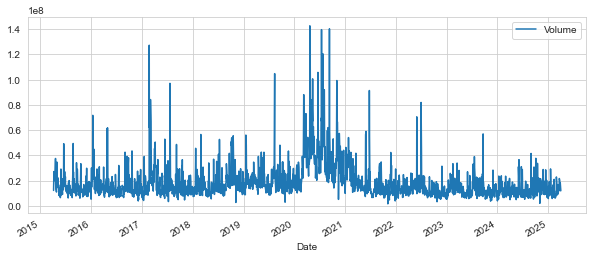

In [116]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
stock_data3['Volume'].plot(legend=True,figsize=(10,4))
plt.show()

In [117]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    stock_data3[column_name]=pd.DataFrame.rolling(stock_data3['Adj Close'],ma).mean()

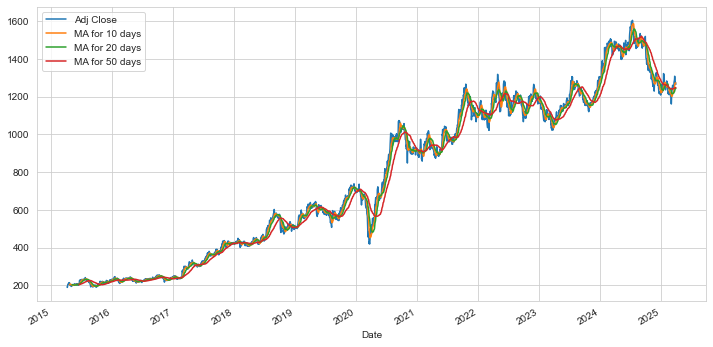

In [118]:
stock_data3[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

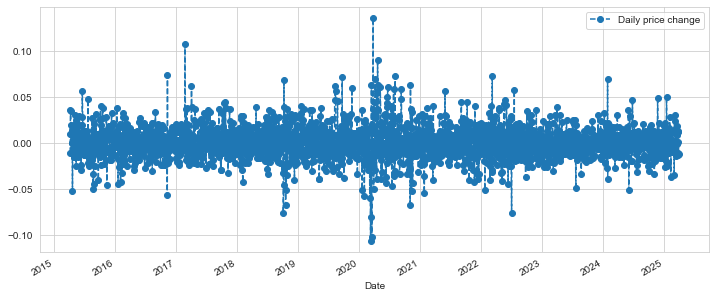

In [119]:
# use pct_change to find the percent change for each day
stock_data3['Daily price change'] =  stock_data3['Adj Close'].pct_change()
# plot the daily return percentage
stock_data3['Daily price change'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

In [120]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24505 entries, 0 to 24504
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       24505 non-null  datetime64[ns]
 1   Ticker     24505 non-null  object        
 2   Open       24505 non-null  float64       
 3   High       24505 non-null  float64       
 4   Low        24505 non-null  float64       
 5   Close      24505 non-null  float64       
 6   Adj Close  24505 non-null  float64       
 7   Volume     24505 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.5+ MB


In [121]:
# Step 2: Recalculate the Daily Return
s_data['Daily_Return'] = ((s_data['Adj Close'] - s_data['Open']) / s_data['Close']) * 100

In [122]:
# Pivot the dataset to organize by Ticker
daily_returns = s_data.pivot(index='Date', columns='Ticker', values='Daily_Return')

# Reset the index to integers if required
daily_returns.reset_index(drop=True, inplace=True)
daily_returns.index = range(1, len(daily_returns) + 1)
daily_returns.head() 

Ticker  ADANIPOWER.BO  APOLLOHOSP.BO  BHARTIARTL.NS  HDFCBANK.BO  \
1            1.390369       1.857258       5.425614    11.376235   
2           -2.332977       4.587939       4.433772    11.014204   
3            0.000000       5.523522       2.184134    11.359506   
4            0.102039       5.006305       8.004844     9.588599   
5           -0.102457       1.943743       3.917322    12.429516   

Ticker  HEROMOTOCO.BO  ICICIBANK.BO    INFY.BO  MARUTI.BO  RELIANCE.NS  \
1           26.536473      9.106283  31.654114   7.831940    11.829842   
2           28.481776      9.406637  32.556918   8.386468     9.669345   
3           28.848533      9.001681  30.619670   7.097898     6.929192   
4           27.426030      7.298305  31.682649   6.762119     7.400100   
5           28.608640      8.316103  30.673082   7.338342     9.528138   

Ticker     TCS.NS  
1       17.785186  
2       16.423726  
3       15.538429  
4       17.015013  
5       17.002713

In [123]:
daily_returns = daily_returns.drop(columns=["ADANIPOWER.BO"])
daily_returns.head() 

Ticker  APOLLOHOSP.BO  BHARTIARTL.NS  HDFCBANK.BO  HEROMOTOCO.BO  \
1            1.857258       5.425614    11.376235      26.536473   
2            4.587939       4.433772    11.014204      28.481776   
3            5.523522       2.184134    11.359506      28.848533   
4            5.006305       8.004844     9.588599      27.426030   
5            1.943743       3.917322    12.429516      28.608640   

Ticker  ICICIBANK.BO    INFY.BO  MARUTI.BO  RELIANCE.NS     TCS.NS  
1           9.106283  31.654114   7.831940    11.829842  17.785186  
2           9.406637  32.556918   8.386468     9.669345  16.423726  
3           9.001681  30.619670   7.097898     6.929192  15.538429  
4           7.298305  31.682649   6.762119     7.400100  17.015013  
5           8.316103  30.673082   7.338342     9.528138  17.002713

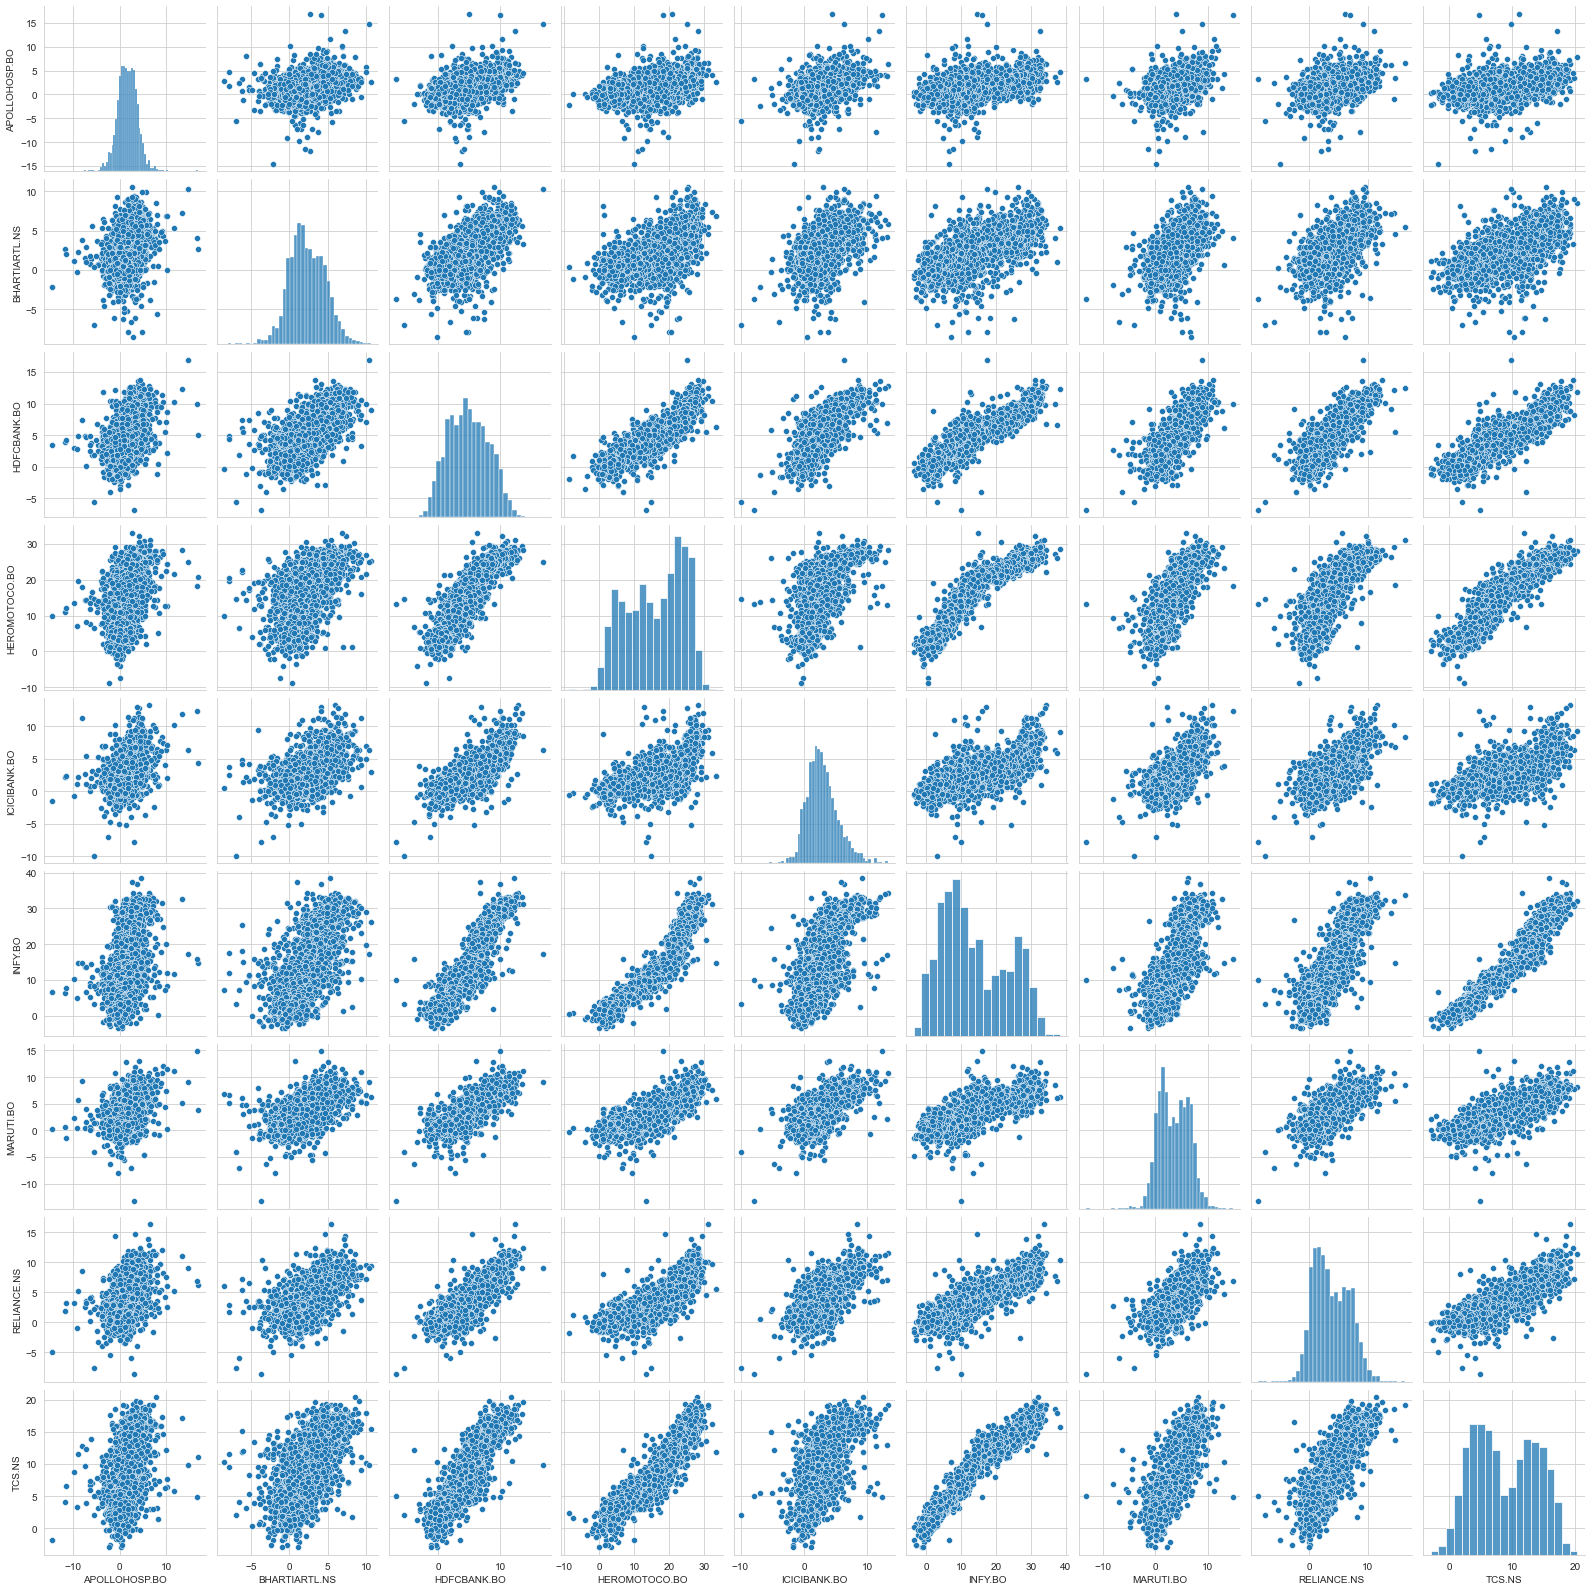

In [124]:
sns.pairplot(data=daily_returns)

<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

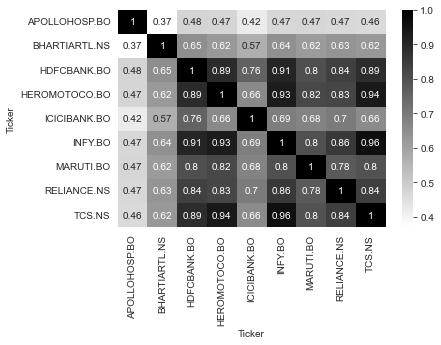

In [125]:
sns.heatmap(daily_returns.corr(),annot=True,cmap='gray_r',linecolor="black")

In [126]:
stock_data3.head()

Ticker   Open   High    Low  Adj Close    Volume  \
Date                                                                
2015-04-06  RELIANCE.NS  169.0  189.0  192.0      191.0  12334096   
2015-04-07  RELIANCE.NS  171.0  190.0  191.0      189.0  21275454   
2015-04-08  RELIANCE.NS  177.0  198.0  199.0      191.0  24821205   
2015-04-09  RELIANCE.NS  183.0  205.0  205.0      198.0  27276420   
2015-04-10  RELIANCE.NS  185.0  207.0  208.0      205.0  25323219   

            Daily price change  % daily price change  Smoothed Change  \
Date                                                                    
2015-04-06                 NaN             11.518325              NaN   
2015-04-07           -0.010471              9.523810              NaN   
2015-04-08            0.010582              7.329843              NaN   
2015-04-09            0.036649              7.575758              NaN   
2015-04-10            0.035354              9.756098              NaN   

            MA for 10 days  MA for 20 days  MA for 50 days  
Date                                                        
2015-04-06             NaN             NaN             NaN  
2015-04-07             NaN             NaN             NaN  
2015-04-08             NaN             NaN             NaN  
2015-04-09             NaN             NaN             NaN  
2015-04-10             NaN             NaN             NaN

In [127]:
missing_values = pd.DataFrame(stock_data3.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Adj Close                          0
Volume                             0
Daily price change                 1
% daily price change               0
Smoothed Change                   19
MA for 10 days                     9
MA for 20 days                    19
MA for 50 days                    49

In [128]:
# Fill missing values using forward fill
stock_data3.fillna(method='ffill', inplace=True)
# Optionally, use backward fill
stock_data3.fillna(method='bfill', inplace=True)

In [129]:
missing_values = pd.DataFrame(stock_data3.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0
MA for 10 days                     0
MA for 20 days                     0
MA for 50 days                     0

In [130]:
stock_data.head()

Date         Ticker  Open    High     Low  Adj Close   Volume
0 2015-04-06  ADANIPOWER.BO    47    48.0    47.0         48   401324
1 2015-04-06  APOLLOHOSP.BO  1361  1411.0  1361.0       1386    12324
2 2015-04-06  BHARTIARTL.NS   343   363.0   343.0        363  4825167
3 2015-04-06    HDFCBANK.BO   460   518.0   460.0        518   158370
4 2015-04-06  HEROMOTOCO.BO  1956  2672.0  1956.0       2656    13860

In [131]:
col=['Open','High','Low','Adj Close']
stock_data[col]=stock_data[col].astype(float)

In [132]:
stock_data.head()

Date         Ticker    Open    High     Low  Adj Close   Volume
0 2015-04-06  ADANIPOWER.BO    47.0    48.0    47.0       48.0   401324
1 2015-04-06  APOLLOHOSP.BO  1361.0  1411.0  1361.0     1386.0    12324
2 2015-04-06  BHARTIARTL.NS   343.0   363.0   343.0      363.0  4825167
3 2015-04-06    HDFCBANK.BO   460.0   518.0   460.0      518.0   158370
4 2015-04-06  HEROMOTOCO.BO  1956.0  2672.0  1956.0     2656.0    13860

In [133]:
stock_data["Daily price change"]= stock_data["Adj Close"]-stock_data["Open"]

In [134]:
stock_data.head()

Date         Ticker    Open    High     Low  Adj Close   Volume  \
0 2015-04-06  ADANIPOWER.BO    47.0    48.0    47.0       48.0   401324   
1 2015-04-06  APOLLOHOSP.BO  1361.0  1411.0  1361.0     1386.0    12324   
2 2015-04-06  BHARTIARTL.NS   343.0   363.0   343.0      363.0  4825167   
3 2015-04-06    HDFCBANK.BO   460.0   518.0   460.0      518.0   158370   
4 2015-04-06  HEROMOTOCO.BO  1956.0  2672.0  1956.0     2656.0    13860   

   Daily price change  
0                 1.0  
1                25.0  
2                20.0  
3                58.0  
4               700.0

In [135]:
stock_data["% daily price change"]= ((stock_data["Daily price change"])/stock_data["Adj Close"])*100

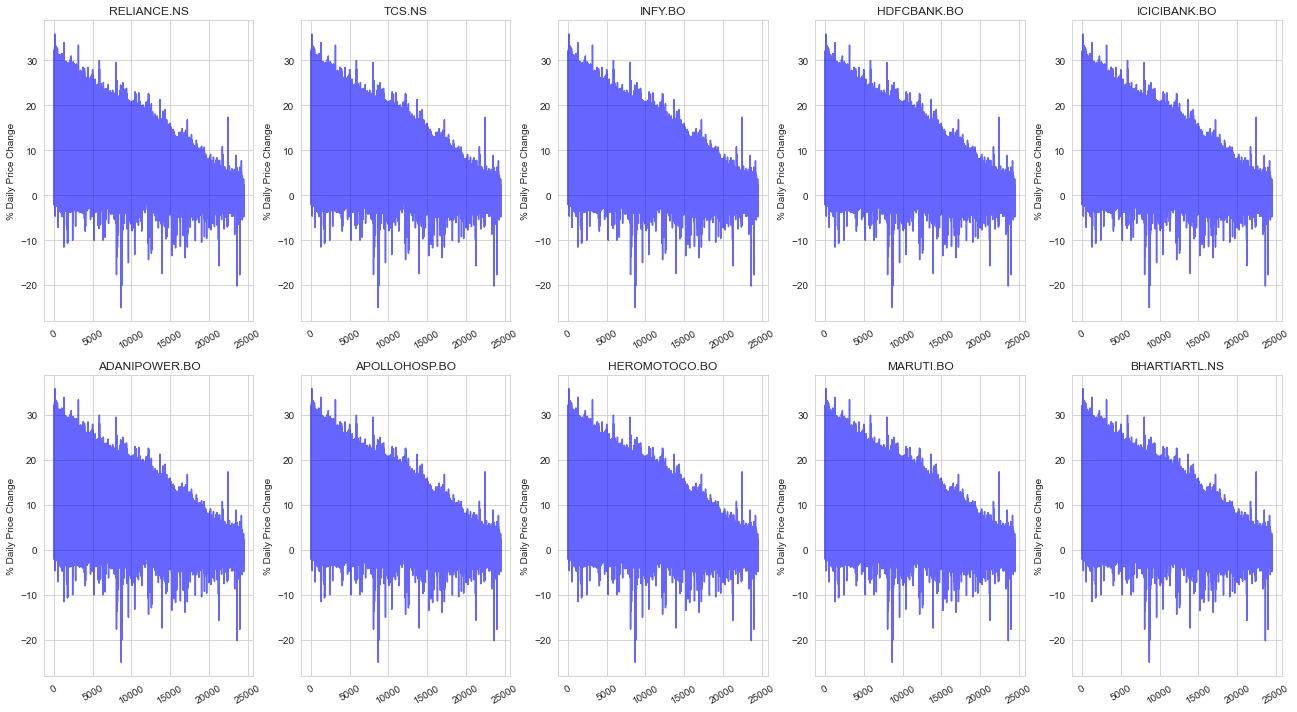

In [136]:
# Fetch stock data for each ticker and store it in a dictionary
all_stock_data = {}

for ticker in tickers:
    all_stock_data[ticker] = stock_data  # Store in dictionary

# Define the subplot grid (2 rows, 4 columns)
nrows, ncols = 2, 5  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))  # Set figure size

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each ticker's daily price change on its respective subplot
for i, ticker in enumerate(tickers):
    axes[i].plot(all_stock_data[ticker].index, all_stock_data[ticker]["% daily price change"], color="blue", alpha=0.6)
    axes[i].set_title(ticker)  # Set title as the ticker name
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability
    axes[i].set_ylabel("% Daily Price Change")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [137]:
stock_data["Smoothed Change"] = stock_data["% daily price change"].rolling(window=30).mean()  # Apply smoothing
stock_data.dropna(inplace=True)  # Remove NaN values

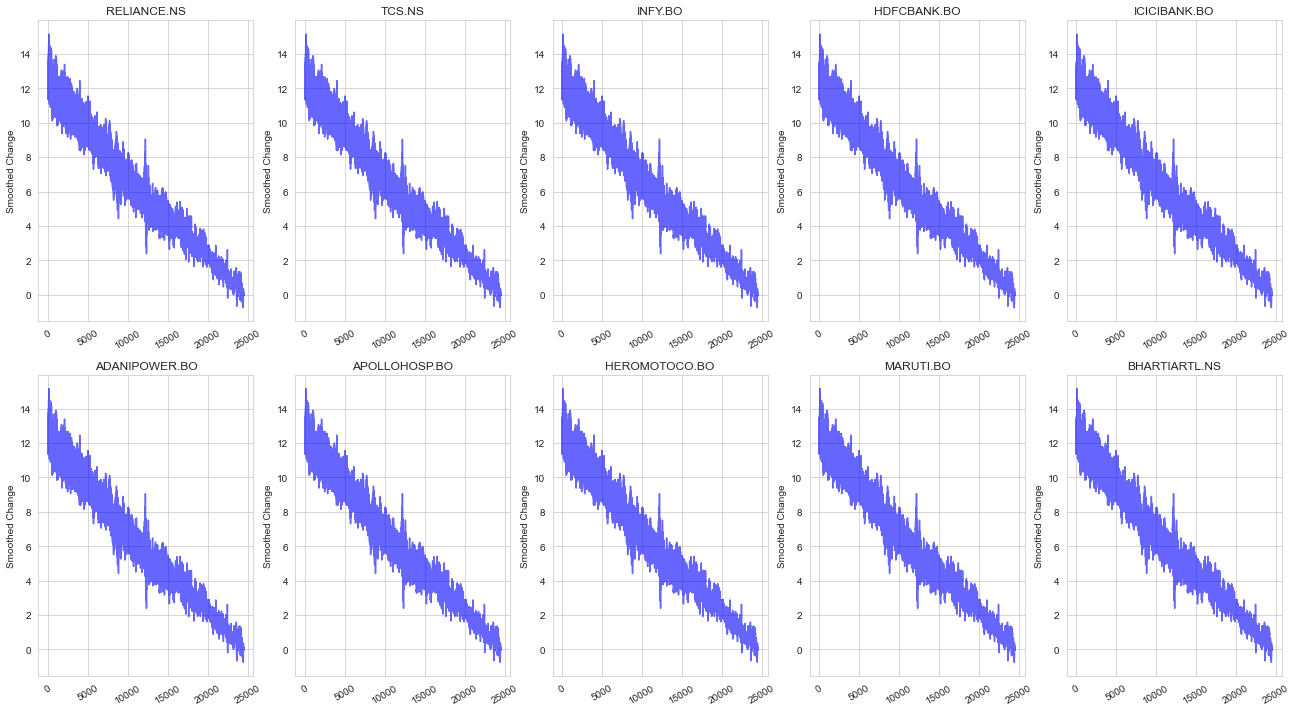

In [138]:
# Fetch stock data for each ticker and store it in a dictionary
all_stock_data = {}

for ticker in tickers:
    all_stock_data[ticker] = stock_data  # Store in dictionary

# Define the subplot grid (2 rows, 4 columns)
nrows, ncols = 2, 5  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))  # Set figure size

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each ticker's daily price change on its respective subplot
for i, ticker in enumerate(tickers):
    axes[i].plot(all_stock_data[ticker].index, all_stock_data[ticker]["Smoothed Change"], color="blue", alpha=0.6)
    axes[i].set_title(ticker)  # Set title as the ticker name
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability
    axes[i].set_ylabel("Smoothed Change")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [139]:
# Convert 'Date' column to datetime if it's not already in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

In [140]:
# use pct_change to find the percent change for each day
stock_data['Daily price change'] =  stock_data['Adj Close'].pct_change()

In [141]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Adj Close                          0
Volume                             0
Daily price change                 1
% daily price change               0
Smoothed Change                    0

In [142]:
stock_data = stock_data.dropna(subset=['Daily price change'])

In [143]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0

In [144]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    stock_data[column_name]=pd.DataFrame.rolling(stock_data['Adj Close'],ma).mean()
stock_data.dropna(inplace=True)  # Remove NaN values

In [145]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0
MA for 10 days                     0
MA for 20 days                     0
MA for 50 days                     0

In [146]:
stock_data["EMA_10"] = stock_data["Adj Close"].ewm(span=10, adjust=False).mean()  # Short-term trend
stock_data["EMA_50"] = stock_data["Adj Close"].ewm(span=50, adjust=False).mean()  # Medium-term trend
stock_data["EMA_200"] = stock_data["Adj Close"].ewm(span=200, adjust=False).mean()  # Long-term trend

In [147]:
stock_data.head()

Ticker    Open    High     Low  Adj Close    Volume  \
Date                                                                     
2015-04-17    RELIANCE.NS   190.0   214.0   190.0      214.0  23958678   
2015-04-17         TCS.NS  1027.0  1279.0  1027.0     1279.0   9668742   
2015-04-20  ADANIPOWER.BO    46.0    48.0    46.0       48.0    726213   
2015-04-20  APOLLOHOSP.BO  1236.0  1320.0  1236.0     1320.0     12536   
2015-04-20  BHARTIARTL.NS   344.0   364.0   344.0      364.0   3642501   

            Daily price change  % daily price change  Smoothed Change  \
Date                                                                    
2015-04-17           -0.608775             11.214953        13.989693   
2015-04-17            4.976636             19.702893        14.359100   
2015-04-20           -0.962471              4.166667        13.454459   
2015-04-20           26.500000              6.363636        13.376725   
2015-04-20           -0.724242              5.494505        12.984299   

            MA for 10 days  MA for 20 days  MA for 50 days      EMA_10  \
Date                                                                     
2015-04-17           731.8          756.00          809.72  214.000000   
2015-04-17           838.6          791.95          824.90  407.636364   
2015-04-20           712.1          783.80          773.36  342.247934   
2015-04-20           839.3          783.45          793.98  520.021037   
2015-04-20           738.0          799.20          790.22  491.653576   

                EMA_50     EMA_200  
Date                                
2015-04-17  214.000000  214.000000  
2015-04-17  255.764706  224.597015  
2015-04-20  247.617070  222.839831  
2015-04-20  289.671303  233.756847  
2015-04-20  292.586154  235.052799

In [148]:
# Create target variable (Close Price after 365 days)
stock_data["Close_365"] = stock_data["Adj Close"].shift(-365)
# Drop rows with NaN target values (since shifting creates NaNs)
stock_data = stock_data.dropna()

In [149]:
stock_data.columns

Index(['Ticker', 'Open', 'High', 'Low', 'Adj Close', 'Volume',
       'Daily price change', '% daily price change', 'Smoothed Change',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'EMA_10',
       'EMA_50', 'EMA_200', 'Close_365'],
      dtype='object')

In [150]:
delta = stock_data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
stock_data['RSI_14'] = 100 - (100 / (1 + rs))

stock_data['SMA_20'] = stock_data['Adj Close'].rolling(window=20).mean()
stock_data['BB_Upper'] = stock_data['SMA_20'] + (stock_data['Adj Close'].rolling(window=20).std() * 2)
stock_data['BB_Lower'] = stock_data['SMA_20'] - (stock_data['Adj Close'].rolling(window=20).std() * 2)

stock_data['MACD'] = stock_data['EMA_10'] - stock_data['EMA_50']

In [151]:
stock_data.head()

Ticker    Open    High     Low  Adj Close    Volume  \
Date                                                                     
2015-04-17    RELIANCE.NS   190.0   214.0   190.0      214.0  23958678   
2015-04-17         TCS.NS  1027.0  1279.0  1027.0     1279.0   9668742   
2015-04-20  ADANIPOWER.BO    46.0    48.0    46.0       48.0    726213   
2015-04-20  APOLLOHOSP.BO  1236.0  1320.0  1236.0     1320.0     12536   
2015-04-20  BHARTIARTL.NS   344.0   364.0   344.0      364.0   3642501   

            Daily price change  % daily price change  Smoothed Change  \
Date                                                                    
2015-04-17           -0.608775             11.214953        13.989693   
2015-04-17            4.976636             19.702893        14.359100   
2015-04-20           -0.962471              4.166667        13.454459   
2015-04-20           26.500000              6.363636        13.376725   
2015-04-20           -0.724242              5.494505        12.984299   

            MA for 10 days  ...  MA for 50 days      EMA_10      EMA_50  \
Date                        ...                                           
2015-04-17           731.8  ...          809.72  214.000000  214.000000   
2015-04-17           838.6  ...          824.90  407.636364  255.764706   
2015-04-20           712.1  ...          773.36  342.247934  247.617070   
2015-04-20           839.3  ...          793.98  520.021037  289.671303   
2015-04-20           738.0  ...          790.22  491.653576  292.586154   

               EMA_200  Close_365  RSI_14  SMA_20  BB_Upper  BB_Lower  \
Date                                                                    
2015-04-17  214.000000      502.0     NaN     NaN       NaN       NaN   
2015-04-17  224.597015     2520.0     NaN     NaN       NaN       NaN   
2015-04-20  222.839831      271.0     NaN     NaN       NaN       NaN   
2015-04-20  233.756847      497.0     NaN     NaN       NaN       NaN   
2015-04-20  235.052799      205.0     NaN     NaN       NaN       NaN   

                  MACD  
Date                    
2015-04-17    0.000000  
2015-04-17  151.871658  
2015-04-20   94.630864  
2015-04-20  230.349734  
2015-04-20  199.067422  

[5 rows x 21 columns]

In [152]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0
MA for 10 days                     0
MA for 20 days                     0
MA for 50 days                     0
EMA_10                             0
EMA_50                             0
EMA_200                            0
Close_365                          0
RSI_14                            13
SMA_20                            19
BB_Upper                          19
BB_Lower                          19
MACD                               0

In [153]:
# Drop rows with NaN target values (since shifting creates NaNs)
stock_data = stock_data.dropna()

In [154]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

Missing Values
Ticker                             0
Open                               0
High                               0
Low                                0
Adj Close                          0
Volume                             0
Daily price change                 0
% daily price change               0
Smoothed Change                    0
MA for 10 days                     0
MA for 20 days                     0
MA for 50 days                     0
EMA_10                             0
EMA_50                             0
EMA_200                            0
Close_365                          0
RSI_14                             0
SMA_20                             0
BB_Upper                           0
BB_Lower                           0
MACD                               0

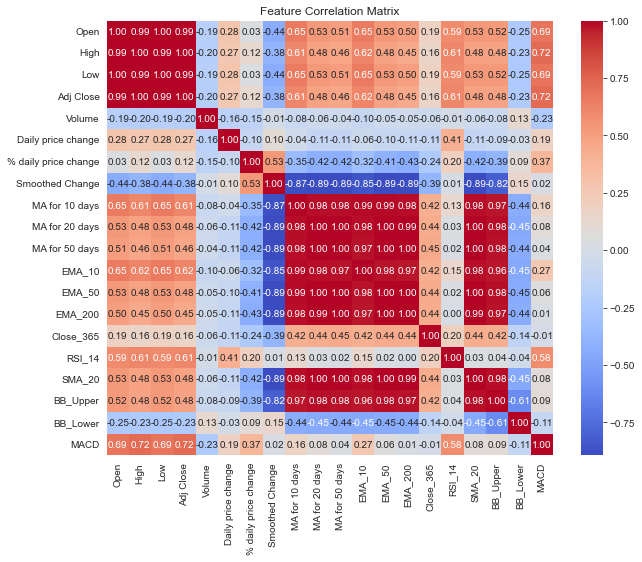

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
correlation_matrix = stock_data.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [156]:
# Define features (X) and target variable (y)
X = stock_data.drop(columns=["Close_365","Ticker","Volume","Adj Close"])  # Drop the target variable
y = stock_data["Close_365"]  # Target variable (Close price after 365 days)

In [157]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from keras.models import Sequential
import keras.backend as K  # Corrected import syntax
from keras.callbacks import EarlyStopping  # Corrected "Callbacks" to "callbacks"
from keras.optimizers import Adam  # Corrected "Optimisers" to "optimizers"
from keras.models import load_model  # Corrected "Models" to "models"
from keras.utils import plot_model  # Corrected "utils. vis_utils" spacing

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17276, 17)
(4320, 17)
(17276,)
(4320,)


In [159]:
Scaler = MinMaxScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

# Scale y
Scaler_y = MinMaxScaler()
y_train_scaled = Scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = Scaler_y.transform(y_test.values.reshape(-1, 1))

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [161]:
# Make predictions
y_pred = lr_model.predict(X_test_scaled)

In [162]:
# Model Evaluation
mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

# Print results
print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation:
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
R² Score: 0.3815


In [163]:
# Convert DataFrame to NumPy array before reshaping
X_train_array = np.array(X_train_scaled)  # Convert DataFrame to NumPy
X_test_array = np.array(X_test_scaled)    # Convert DataFrame to NumPy

# Reshape for LSTM (3D input: [samples, timesteps, features])
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

In [164]:
# Build Improved LSTM Model
lstm_model = Sequential([
    LSTM(256, return_sequences=True, activation='tanh', input_shape=(1, X_train_reshaped.shape[2])),
    Dropout(0.3),  # Regularization to prevent overfitting
    LSTM(128, return_sequences=False, activation='tanh'),
    Dropout(0.3),
    Dense(64, activation='tanh'),
    Dense(1)  # Output layer (single continuous value for stock price)
])

In [165]:
import tensorflow as tf
# Compile Model with Adam Optimizer & Learning Rate Scheduling
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,  # Stop if val_loss doesn't improve for 10 epochs
    restore_best_weights=True,  
    verbose=1
)
history = lstm_model.fit(X_train_reshaped, y_train_scaled, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test_scaled), callbacks=[early_stopping])

Epoch 1/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - loss: 0.0277 - val_loss: 0.0218
Epoch 2/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0232 - val_loss: 0.0236
Epoch 3/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0227 - val_loss: 0.0205
Epoch 4/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0213 - val_loss: 0.0196
Epoch 5/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0202 - val_loss: 0.0186
Epoch 6/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0197 - val_loss: 0.0179
Epoch 7/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0185 - val_loss: 0.0159
Epoch 8/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0174 - val_loss: 0.0152
Epoch 9/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0164 - val_loss: 0.0154
Epoch 10/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0161 - val_loss: 0.0144
Epoch 11/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0154 - val_loss: 0.0143
Epoch 12/100
270/270 ━━━━━━━

270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 68/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0098 - val_loss: 0.0102
Epoch 69/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 70/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 71/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 72/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 73/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 74/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 75/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 76/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 77/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 78/100
270/270 ━━━━━━━━━━━━

In [ ]:
#  Make Predictions
y_pred_lstm = lstm_model.predict(X_test_reshaped)

In [ ]:
# Inverse transform
y_pred_actual = Scaler_y.inverse_transform(y_pred_lstm)
y_test_actual = Scaler_y.inverse_transform(y_test_scaled)

In [ ]:
# Metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
from sklearn.svm import SVR

# Define an SVR model
svm_model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.01)

# Train the model on scaled training data (X_train, y_train)
svm_model.fit(X_train_scaled, y_train_scaled.ravel())

In [ ]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Model Evaluation
mae = mean_absolute_error(y_test_scaled, y_pred_svm)
mse = mean_squared_error(y_test_scaled, y_pred_svm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred_svm)

# Print results
print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# Save the trained SVM model
with open("svm_stock_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

In [ ]:
print("Input Shape for SVM Model:", X_train_scaled.shape)